In [16]:
%matplotlib inline

In [17]:
from scipy.spatial.distance import jaccard
from framed.cobra.ensemble import load_ensemble
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

### Load models

In [18]:
organisms = ['B. subtilis', 'E. coli', 'M. genitalium', 'P. aeruginosa', 'R. solanacearum', 'S. oneidensis']

models = {
    'E. coli': '../models/CarveMe/Ecoli_K12_MG1655_ensemble.xml',
    'M. genitalium': '../models/CarveMe/M_genitalium_G37_ensemble.xml',
    'B. subtilis': '../models/CarveMe/Bsubtilis_168_ensemble.xml',
    'P. aeruginosa': '../models/CarveMe/Paeruginosa_PAO1_ensemble.xml',
    'R. solanacearum': '../models/CarveMe/Rsolanacearum_GMI1000_ensemble.xml',
    'S. oneidensis': '../models/CarveMe/Soneidensis_MR1_ensemble.xml'
}

for label, model_file in models.items():
    models[label] =  load_ensemble(model_file, flavor='cobra')

### Compute distances

In [19]:
def ensemble_distance(ensemble):
    bin_matrix = [[int(ensemble.reaction_states[r_id][i])
                   for r_id in ensemble.reaction_states]
                  for i in range(ensemble.size)]
    
    distances = [jaccard(bin_matrix[i], bin_matrix[j])
                 for i in range(ensemble.size)
                 for j in range(i+1, ensemble.size)]
    
    return distances

In [20]:
dists = {label: ensemble_distance(model) for label, model in models.items()}

### Plot results

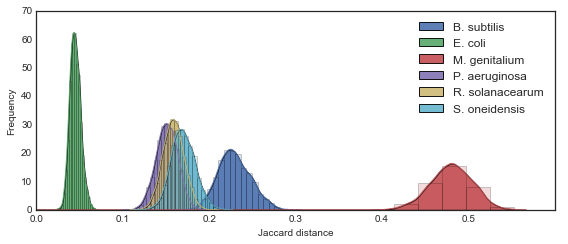

In [21]:
_, ax = plt.subplots(figsize=(8,3.5))

colors = sns.color_palette('deep', n_colors=6)

for i, label in enumerate(organisms):
    sns.distplot(dists[label], ax=ax, bins=20, kde=True, norm_hist=True, color=colors[i],
                  hist_kws={'alpha': 0.2}, kde_kws={'shade': True, 'alpha':0.9})

ax.set_xlabel('Jaccard distance')
ax.set_ylabel('Frequency')
ax.legend(organisms)
ax.set_xlim(0,0.6)
ax.set_ylim(0,70)
plt.tight_layout()
plt.savefig('../results/other/ensemble_distances.png', dpi=300)